In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

[[0.87662021 0.62221597]
 [0.1238276  0.40823535]
 [0.56903455 0.66099929]
 [0.45514925 0.86497636]
 [0.5290312  0.71048079]
 [0.15256624 0.3017052 ]
 [0.39455476 0.61992975]
 [0.0304798  0.65263997]
 [0.09001613 0.39220235]
 [0.23830353 0.06844883]
 [0.58857227 0.47300411]
 [0.51499799 0.98914008]
 [0.8941027  0.66763898]
 [0.98975112 0.36227308]
 [0.46048099 0.31414037]
 [0.17883179 0.72431616]
 [0.8310288  0.15478855]
 [0.42277387 0.88331673]
 [0.42293494 0.28582968]
 [0.12144275 0.3730128 ]
 [0.35631804 0.81554326]
 [0.23810778 0.9593379 ]
 [0.11883587 0.36302297]
 [0.33545975 0.95342892]
 [0.72947318 0.05909439]
 [0.012658   0.31328752]
 [0.22955999 0.6979083 ]
 [0.55087866 0.69144695]
 [0.96194012 0.74730952]
 [0.9509173  0.72876089]
 [0.61829036 0.77824095]
 [0.67531634 0.92225197]
 [0.63924115 0.00681071]
 [0.89855222 0.3471523 ]
 [0.75332414 0.79173957]
 [0.6504194  0.79893225]
 [0.39491658 0.24224546]
 [0.63599057 0.43117834]
 [0.87186474 0.144516  ]
 [0.07293662 0.5792443 ]


<AxesSubplot:xlabel='x', ylabel='y'>

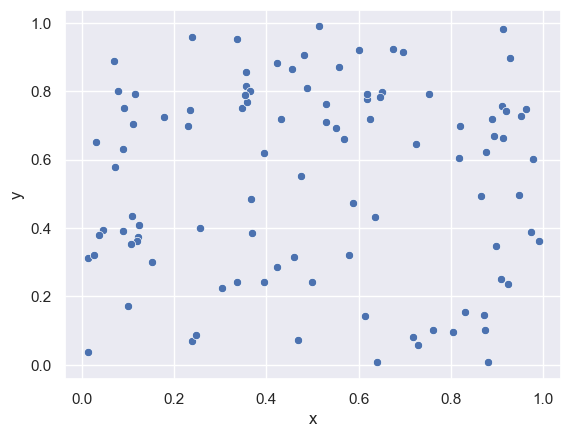

In [48]:
sns.set_theme()
dimension = 2
numPoints = 100
data = np.random.rand(numPoints,dimension)
print(data)
data = pd.DataFrame(data, columns=["x", "y"])
sns.scatterplot(data=data, x="x", y="y")


Generate random centroids for K clusters
Initialize clusters

In [49]:
def generateRandomCenteroids(numClusters, dimension):
    return np.random.rand(numClusters, dimension)

numClusters = 4
centroids = generateRandomCenteroids(numClusters, dimension)
clusters = []
for i in range(numClusters):
    clusters.append([centroids[i], []])

print(clusters)

[[array([0.64527298, 0.46433598]), []], [array([0.21958776, 0.57311342]), []], [array([0.18202595, 0.14149935]), []], [array([0.67337475, 0.97624338]), []]]


Assign points to clusters (Expectation step)

           x         y
0   0.876620  0.622216
1   0.123828  0.408235
2   0.569035  0.660999
3   0.455149  0.864976
4   0.529031  0.710481
..       ...       ...
95  0.108406  0.434174
96  0.469044  0.073614
97  0.354256  0.787531
98  0.037901  0.378473
99  0.919386  0.741311

[100 rows x 2 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

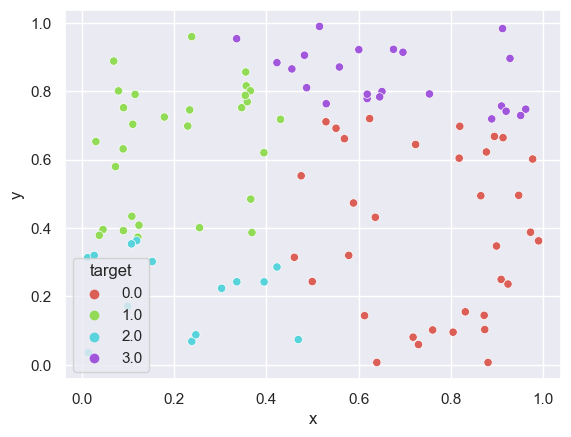

In [60]:
def EuclideanDistance(point, centroid, dimension):
    distance = 0
    for i in range(dimension):
        distance += (point[i]-centroid[i])*(point[i]-centroid[i])
    return distance

def assignPointsToClusters(data, clusters):
    target = np.empty([numPoints, 1])
    i = 0
    for row in data.to_numpy():
        distanceCentroid = [0,0] # index = 0 for centroid index, 1 for distance with centroid
        for cluster in range(numClusters):
            tempDistance = EuclideanDistance(row, clusters[cluster][0], dimension)
            if (distanceCentroid[1]==0 or tempDistance<distanceCentroid[1]):
                distanceCentroid[0] = cluster
                distanceCentroid[1] = tempDistance
        target[i] = int(distanceCentroid[0])
        clusters[distanceCentroid[0]][1].append(row)
        i += 1
    #print(target)
    data['target'] = target
    #print(clusters[1])
            
assignPointsToClusters(data, clusters)
print(data.iloc[:, 0:2])
sns.scatterplot(data=data, x='x', y='y', hue=data['target'], palette=sns.color_palette("hls",numClusters), legend="full")
#plt.show()

Recalculate the centroid (Maximization)

In [62]:
def initCentroids(centroids):
    centroids = np.zeros([numClusters, dimension])
initCentroids(centroids)
for cluster in clusters:
    cluster[0] = np.sum(cluster[1])/len(cluster[1])
print(cluster)

IndexingError: Too many indexers